1. obtain data
2. baseline model
3. one qualitative and quantitative result
4. Provide a convincing argument for the feasibility of completing the project within the time available

In [ ]:
import csv
import numpy as np
import random
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from collections import OrderedDict
torch.manual_seed(6) # set the random seed

import pandas as pd


In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 51 kB 189 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45230 sha256=15267a557f9c73e6974944f6093a758f3fc33aeab1983818c178cf57d2abbda6
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
# From Tianyi's Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/train_ab.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Amanita_Bisporigera
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Amanita_muscaria_train.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Amanita_Muscaria
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Boletus_train.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Boletus_Edulis
!unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Cantharellus_train.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Omphalotus_olearius_train.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Omphalotus_Olearius
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Russula_mariae_train.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Russula_Mariae
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/train_lr.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Lactarius_Rufus
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Agaricus_diminutivus_train.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train/Agaricus_Diminutivus


In [ ]:
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/valid_ab.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Amanita_Bisporigera
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Amanita_muscaria_valid.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Amanita_Muscaria
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Boletus_valid.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Boletus_Edulis
!unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Cantharellus_valid.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/
#!unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Omphalotus_olearius_val.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Russula_mariae_valid.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Russula_Mariae
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/valid_lr.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Lactarius_Rufus
#!unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/Agaricus_diminutivus_val.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid/


In [ ]:
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/test_ab.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Amanita_Bisporigera
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Amanita_muscaria_test.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Amanita_Muscaria
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Boletus_test.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Boletus_Edulis
!unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Cantharellus_test.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Cantharellus
#!unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Omphalotus_olearius_test.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Russula_mariae_test.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Russula_Mariae
# !unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/test_lr.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Lactarius_Rufus
#!unzip /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/Agaricus_diminutivus_test.zip -d /content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test/


In [ ]:
# Mount from Yuewen's google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Molly
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Gesture Images from Google Drive
# Dataset locations on Tianyi's Google Drive
train_path = '/content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Train'
valid_path = '/content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Valid'
test_path = '/content/drive/MyDrive/UofT_2021_Fall/APS360/aps360_project/mushroom_data/Test'

In [ ]:
# Loading Gesture Images from Google Drive
# Dataset locations on Yuewen's Google Drive
train_path = '/content/drive/MyDrive/UofT 2021 Fall/APS360/aps360_project/mushroom_data/Train'
valid_path = '/content/drive/MyDrive/UofT 2021 Fall/APS360/aps360_project/mushroom_data/Valid'
test_path = '/content/drive/MyDrive/UofT 2021 Fall/APS360/aps360_project/mushroom_data/Test'

In [ ]:
# Resize images to 224x224
transform = transforms.Compose([transforms.Resize((224,224)), 
                                  transforms.ToTensor()])
# data_transform = transforms.Compose([                 !!!!!!! ADD LATER !!!!!!!!!
#     transforms.Resize(256),
#     transforms.ColorJitter(),
#     transforms.RandomCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.Resize(128),
#     transforms.ToTensor()   T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# Load data from Colab
train_data = torchvision.datasets.ImageFolder(root=train_path, transform=transform)
valid_data = torchvision.datasets.ImageFolder(root=valid_path, transform=transform)
test_data = torchvision.datasets.ImageFolder(root=test_path, transform=transform)

# Check the size of datasets
print("size of train_data:", len(train_data))
print("size of valid_data:", len(valid_data))
print("size of test_data:", len(test_data))

size of train_data: 2798
size of valid_data: 600
size of test_data: 599


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


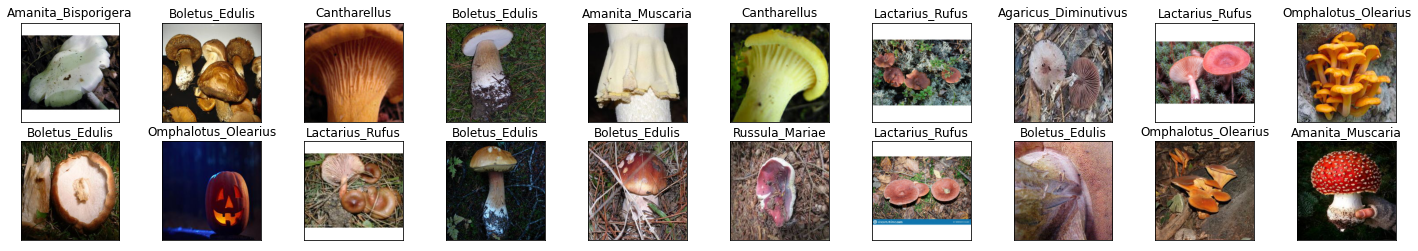

In [ ]:
# test if images are loaded correctly
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, 
                                          num_workers=1, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, 
                                          num_workers=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, 
                                          num_workers=1, shuffle=True)

# Verification Step - obtain one batch of images
dataiter = iter(valid_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['Agaricus_Diminutivus', 'Amanita_Bisporigera', 'Amanita_Muscaria', 'Boletus_Edulis', 'Cantharellus', 'Lactarius_Rufus', 'Omphalotus_Olearius', 'Russula_Mariae']
labels.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  plt.imshow(np.transpose(images[idx], (1, 2, 0)))
  ax.set_title(classes[labels[idx]])

In [ ]:
# this is our baseline model
# one convolutional layer, one pooling layer and the fully connected layers

# number of CNN layers: 1
# number of ANN (fully connected NN) layers: 2
# pooling layers: 2 MaxPooling layers
# activation function: relu

# Size of input and output: (o = (i - k + 2p)/s + 1)
# 3*224*xx4   -> CNN 1  -> 5*220*220
# 5*220*220   -> pool 1 -> 5*110*100
# 5*110*110

class MushroomBase(nn.Module):
    def __init__(self):
        super(MushroomBase, self).__init__()
        self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        self.fc1 = nn.Linear(5*110*110, 100) #in_channels, hidden units
        self.fc2 = nn.Linear(100, 8) #hidden units, out_channels
        self.name = "MushroomBase"

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 5*110*110)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# class MushroomBase(nn.Module):
#     def __init__(self):
#         super(MushroomBase, self).__init__()
#         self.name = "MushroomBase"
#         # input channel is 3 (RGB), 10 feature maps produced, kernel size is 5
#         self.conv1 = nn.Conv2d(3, 10, 5)
#         # kernel size for max pooling is 2, stride is 2
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(10*110*110, 100)
#         # output dimension is 2, we have 2 classes, edible and poisonous
#         self.fc2 = nn.Linear(100, 8)

#     def forward(self, x):
#         # activation function is relu, one convolution layers and one pooling layer
#         x = self.pool(F.relu(self.conv1(x)))
#         # flatten into fully connected layer, calculation is above
#         x = x.view(-1, 10*110*110)
#         x = F.relu(self.fc1(x)) # apply relu activation function
#         x = self.fc2(x)
#         x = x.squeeze(1)

#         return x

In [ ]:
# def get_accuracy(model, data_loader):

#     correct = 0
#     total = 0
#     for imgs, labels in data_loader:
        
        
#         #############################################
#         #To Enable GPU Usage
#         if use_cuda and torch.cuda.is_available():
#           imgs = imgs.cuda()
#           labels = labels.cuda()
#         #############################################
        
        
#         output = model(imgs)
        
#         #select index with maximum prediction score
#         pred = torch.sigmoid(output)
#         for i in range(len(pred)):
#           p = pred[i]
#           p = 1 if p > 0.5 else 0 
#           correct += p == (labels[i]).item()

#         #correct += pred.eq(labels.view_as(pred)).sum().item()
#         total += imgs.shape[0]
#     return correct / total
  
def get_accuracy(model, data_loader):

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path


In [ ]:
# def train(model, train_data, valid_data,
#           batch_size=64, num_epochs=10, learn_rate=0.001):
#     train_loader = torch.utils.data.DataLoader(train_data, 
#                       batch_size=batch_size, num_workers=1, shuffle=True)
#     valid_loader = torch.utils.data.DataLoader(valid_data, 
#                       batch_size=batch_size, num_workers=1, shuffle=True)
#     criterion = nn.BCEWithLogitsLoss()
#     optimizer = optim.Adam(model.parameters(), lr=learn_rate)

#     iters, losses, train_acc, val_acc = [], [], [], []

#     # training
#     n = 0 # the number of iterations
#     for epoch in range(num_epochs):
#         for imgs, labels in iter(train_loader):
          
#             labels = labels.type(torch.FloatTensor)
#             #############################################
#             #To Enable GPU Usage
#             if use_cuda and torch.cuda.is_available():
#               imgs = imgs.cuda()
#               labels = labels.cuda()
#             #############################################
            
              
#             out = model(imgs)             # forward pass
#             loss = criterion(out, labels) # compute the total loss
#             loss.backward()               # backward pass (compute parameter updates)
#             optimizer.step()              # make the updates for each parameter
#             optimizer.zero_grad()         # a clean up step for PyTorch

#         # save the current training information
#         iters.append(n)
#         losses.append(float(loss)/batch_size)             # compute *average* loss
#         train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
#         val_acc.append(get_accuracy(model, valid_loader))  # compute validation accuracy

#         print(("Epoch {}: Train acc: {} |"+ "Validation acc: {} |" +
#                 "Average loss: {}").format(
#                 epoch,
#                 train_acc[epoch],
#                 val_acc[epoch],
#                 losses[epoch]))
#         # Save the current model (checkpoint) to a file
#         model_path = get_model_name(model.name, batch_size, learn_rate, epoch)
#         torch.save(model.state_dict(), model_path)

#         n += 1

#     # plotting
#     plt.title("Training Curve")
#     plt.plot(iters, losses, label="Train")
#     plt.xlabel("Iterations")
#     plt.ylabel("Loss")
#     plt.show()

#     plt.title("Training Curve")
#     plt.plot(iters, train_acc, label="Train")
#     plt.plot(iters, val_acc, label="Validation")
#     plt.xlabel("Iterations")
#     plt.ylabel("Training Accuracy")
#     plt.legend(loc='best')
#     plt.show()

    # print("Final Training Accuracy: {}".format(train_acc[-1]))
    # print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
# enabled GPU training function
# reference: tutorial 3 code and tutorial 2 code

def train(model, train_data, valid_data, batch_size=64, learning_rate=0.01, num_epochs=30):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size, 
                                          num_workers=1, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size, 
                                              num_workers=1, shuffle=True)
    #test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, 
                                             #num_workers=1, shuffle=True)    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        val_acc.append(get_accuracy(model, valid_loader))  # compute validation accuracy
        print(("Epoch {}: Train acc: {}, Validation acc: {}").format(
                epoch + 1,
                train_acc[epoch],
                val_acc[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1: Train acc: 0.37205146533238026, Validation acc: 0.36333333333333334


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 2: Train acc: 0.4378127233738385, Validation acc: 0.41333333333333333


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 3: Train acc: 0.5235882773409578, Validation acc: 0.485


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 4: Train acc: 0.6050750536097212, Validation acc: 0.5133333333333333


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 5: Train acc: 0.6336669049320943, Validation acc: 0.5416666666666666


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 6: Train acc: 0.7441029306647605, Validation acc: 0.615


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 7: Train acc: 0.7762687634024303, Validation acc: 0.615


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 8: Train acc: 0.8155825589706933, Validation acc: 0.5916666666666667


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 9: Train acc: 0.8577555396711937, Validation acc: 0.59


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 10: Train acc: 0.8781272337383845, Validation acc: 0.5916666666666667


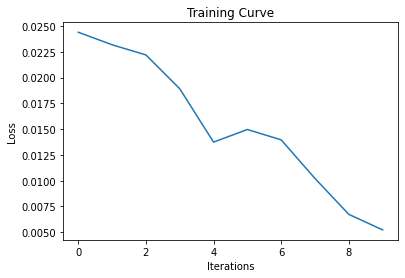

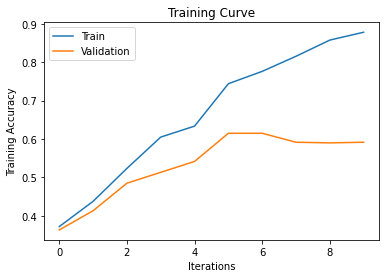

Final Training Accuracy: 0.8781272337383845
Final Validation Accuracy: 0.5916666666666667


In [ ]:
# Train on baseline model
# batch size: 64
# the number of layers : 1 CNN + 1 ANN
# the kernel size of CNN layer: 5, 5
use_cuda = True
model = MushroomBase()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, valid_data, batch_size=64, learning_rate=0.001, num_epochs=10)


In [ ]:
# Tune hyperparameters

In [ ]:
# Primary model
# Convolutional Neural Network Architecture
# number of CNN layers: 2
# number of ANN (fully connected NN) layers: 2
# pooling layers: 2 MaxPooling layers
# activation function: relu

# Size of input and output: (o = (i - k + 2p)/s + 1)
# 3*224*224   -> CNN 1  -> 5*220*220
# 5*220*220   -> pool 1 -> 5*110*100
# 5*110*100   -> CNN 2  -> 10*106*106
# 10*106*106  -> pool 2`-> 10*53*53

class MushroomPrim(nn.Module):
    def __init__(self):
        super(MushroomPrim, self).__init__()
        self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(10*53*53, 32) #in_channels, hidden units
        self.fc2 = nn.Linear(32, 8) #hidden units, out_channels
        self.name = "MushroomPrim"

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*53*53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x


CUDA is available!  Training on GPU ...
Epoch 0: Train acc: 0.6038077969174978 |Validation acc: 0.75 |Average loss: 0.010452859103679657
Epoch 1: Train acc: 0.7116953762466002 |Validation acc: 0.7627118644067796 |Average loss: 0.0108972592279315
Epoch 2: Train acc: 0.7497733454215775 |Validation acc: 0.8050847457627118 |Average loss: 0.00847633183002472
Epoch 3: Train acc: 0.7352674524025385 |Validation acc: 0.6440677966101694 |Average loss: 0.007541637402027845
Epoch 4: Train acc: 0.7080689029918404 |Validation acc: 0.6398305084745762 |Average loss: 0.005131836980581284
Epoch 5: Train acc: 0.8621940163191296 |Validation acc: 0.7245762711864406 |Average loss: 0.00518935639411211
Epoch 6: Train acc: 0.8957388939256573 |Validation acc: 0.7076271186440678 |Average loss: 0.00402054563164711
Epoch 7: Train acc: 0.9301903898458749 |Validation acc: 0.652542372881356 |Average loss: 0.007400196976959705
Epoch 8: Train acc: 0.956482320942883 |Validation acc: 0.6567796610169492 |Average loss: 0.0

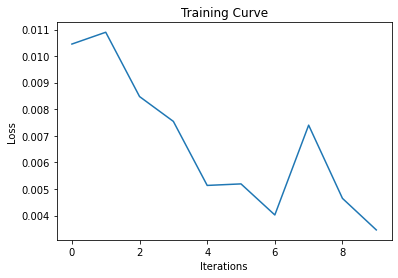

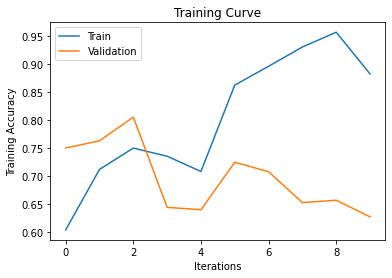

Final Training Accuracy: 0.8821396192203083
Final Validation Accuracy: 0.6271186440677966


In [ ]:
# Train on primary model
# setting 1: (default)
# batch size: 64
# the number of layers : 2 CNN + 2 pooling layers
# the kernel size of CNN layer: 5, 5
use_cuda = True
model = MushroomPrim()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, valid_data,
          batch_size=64, num_epochs=10, learn_rate=0.001)

The model is over-fitting due to the small size of the training data, so we will
collect more data and perform data augmentation later on.

In [ ]:
# Tune hyperparameters
# Primary model version 2
# Convolutional Neural Network Architecture
# number of CNN layers: 2
# number of ANN (fully connected NN) layers: 2
# pooling layers: 2 MaxPooling layers
# activation function: relu

# Size of input and output: (o = (i - k + 2p)/s + 1)
# 3*224*224   -> CNN 1  -> 5*220*220
# 5*220*220   -> pool 1 -> 5*110*100
# 5*110*100   -> CNN 2  -> 10*106*106
# 10*106*106  -> pool 2`-> 10*53*53

# super(MushroomPrim, self).__init__()
#         self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
#         self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
#         self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
#         self.fc1 = nn.Linear(10*53*53, 32) #in_channels, hidden units
#         self.fc2 = nn.Linear(32, 8) #hidden units, out_channels
#         self.name = "MushroomPrim"

class MushroomPrim2(nn.Module):
    def __init__(self):
        super(MushroomPrim2, self).__init__()
        self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(10*53*53, 100) #in_channels, hidden units
        self.fc2 = nn.Linear(100, 1) #hidden units, out_channels
        self.name = "MushroomPrim2"

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*53*53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        x = x.squeeze(1)
        return x
# train(model, train_data, valid_data,
#          batch_size=64, num_epochs=10, learn_rate=0.001)

CUDA is available!  Training on GPU ...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 0: Train acc: 0.5938349954669084 |Validation acc: 0.6101694915254238 |Average loss: 0.010842659510672092
Epoch 1: Train acc: 0.556663644605621 |Validation acc: 0.5423728813559322 |Average loss: 0.010772581212222576
Epoch 2: Train acc: 0.5747960108794198 |Validation acc: 0.576271186440678 |Average loss: 0.010877392254769802
Epoch 3: Train acc: 0.6092475067996374 |Validation acc: 0.6186440677966102 |Average loss: 0.01052217185497284
Epoch 4: Train acc: 0.6128739800543971 |Validation acc: 0.6228813559322034 |Average loss: 0.010856417939066887
Epoch 5: Train acc: 0.6219401631912964 |Validation acc: 0.6271186440677966 |Average loss: 0.010668111965060234
Epoch 6: Train acc: 0.6174070716228468 |Validation acc: 0.635593220338983 |Average loss: 0.011400762014091015
Epoch 7: Train acc: 0.5820489573889392 |Validation acc: 0.5847457627118644 |Average loss: 0.009218364022672176
Epoch 8: Train acc: 0.6310063463281959 |Validation acc: 0.6652542372881356 |Average loss: 0.01063449028879404
Epoch 

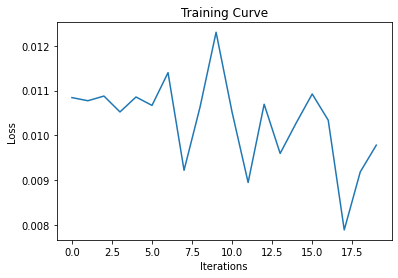

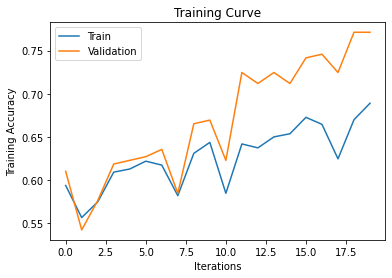

Final Training Accuracy: 0.6890299184043518
Final Validation Accuracy: 0.7711864406779662


In [ ]:
use_cuda = True
model = MushroomPrim2()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, valid_data,
          batch_size=64, num_epochs=20, learn_rate=0.0001)

CUDA is available!  Training on GPU ...
Epoch 0: Train acc: 0.5457842248413418 |Validation acc: 0.5466101694915254 |Average loss: 0.01081722043454647
Epoch 1: Train acc: 0.5883952855847688 |Validation acc: 0.6694915254237288 |Average loss: 0.01063605397939682
Epoch 2: Train acc: 0.6491387126019945 |Validation acc: 0.809322033898305 |Average loss: 0.010264502838253975
Epoch 3: Train acc: 0.6554850407978241 |Validation acc: 0.7838983050847458 |Average loss: 0.00947888009250164
Epoch 4: Train acc: 0.6264732547597461 |Validation acc: 0.7796610169491526 |Average loss: 0.010778645053505898
Epoch 5: Train acc: 0.6844968268359021 |Validation acc: 0.8177966101694916 |Average loss: 0.008934593759477139
Epoch 6: Train acc: 0.6944696282864914 |Validation acc: 0.8347457627118644 |Average loss: 0.009809862822294235
Epoch 7: Train acc: 0.7225747960108794 |Validation acc: 0.8177966101694916 |Average loss: 0.007172157522290945
Epoch 8: Train acc: 0.6863100634632819 |Validation acc: 0.8347457627118644 |

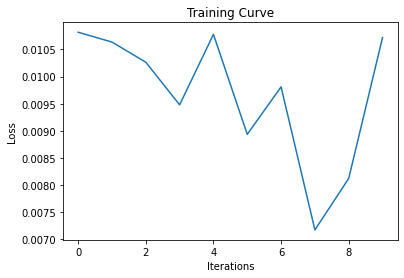

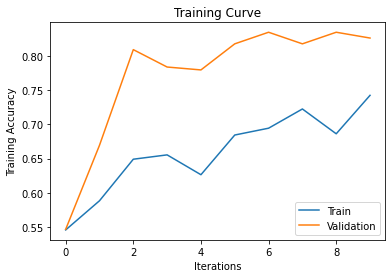

Final Training Accuracy: 0.742520398912058
Final Validation Accuracy: 0.826271186440678


In [ ]:
use_cuda = True
model = MushroomPrim2()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, valid_data,
          batch_size=64, num_epochs=10, learn_rate=0.0002)

In [ ]:
# TUT 5:

# use two output neurons instead of one, even in a binary classification task. 
# an extra neuron adds some more parameters to the network, and makes the network a little easier to train (performs better).


In [ ]:
# Transfer learning
import torchvision.models
resnet18 = torchvision.models.resnet.resnet18(pretrained=True)
torch.manual_seed(6) # set the random seed
# Freeze the parameters 
for param in resnet18.parameters():
    param.requires_grad = False 
# model_ft = models.resnet50(pretrained=True)
# ct = 0
# for child in model_ft.children():
# ct += 1
# if ct < 7:
#     for param in child.parameters():
#         param.requires_grad = False
        
import os
# There is no need to transform the data sets (size is already 224*224)
# Prepare Dataloader
batch_size = 128
num_workers = 1

# train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
#                                            num_workers=num_workers, shuffle=True)
# valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
#                                            num_workers=num_workers, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
#                                            num_workers=num_workers, shuffle=True)

#switch device to gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Size of input and output: (o = (i - k + 2p)/s + 1)
# 256*14*14   -> CNN 1  -> 512*10*10
# 512*10*10   -> pool 1 -> 512*5*5
# 512*5*5   -> CNN 2  -> 10**
# 10*250*250  -> pool 2`-> 10*125*125
# [512, 512, 5, 5], expected input[64, 256, 14, 14] to have 512 channels, but got 256 channels instead

cnn_model = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)),
    ('relu1', nn.ReLU()),
    ('conv2', nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)),
    ('relu2', nn.ReLU()),
    ('bn2', nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))    
]))

fc = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(512,100)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(100,8))
    # ('relu2', nn.ReLU()),
    # ('fc3', nn.Linear(32,8)),

]))                              

#resnet18.layer4 = cnn_model
resnet18.fc = fc

#shifting model to gpu
resnet18.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# enabled GPU training function
# reference: tutorial 3 code and tutorial 2 code
use_cuda = True
def train_tf(model, train_data, valid_data, batch_size=64, learning_rate=0.01, num_epochs=30):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size, 
                                          num_workers=1, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size, 
                                              num_workers=1, shuffle=True)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        val_acc.append(get_accuracy(model, valid_loader))  # compute validation accuracy
        print(("Epoch {}: Train acc: {}, Validation acc: {}").format(
                epoch + 1,
                train_acc[epoch],
                val_acc[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name('Resnet18', batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
# Function to classify edible and toxic mushrooms
def edible_poisonous_classifier(mushrooms):
  type_list = []
  for mushroom in mushrooms:
    if mushroom in [0,3,4,7]:
      type_list.append(1) # edible
    else:
      type_list.append(0) # poisonous
  return type_list

In [ ]:
# Get test accuracy
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, 
                                             num_workers=1, shuffle=True)    
best_model = resnet18
best_model_path = ("Resnet18", 128, 0.00055, 11)
state = torch.load(best_model_path)
best_model.load_state_dict(state)

if use_cuda and torch.cuda.is_available():
  best_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

test_acc = get_accuracy(best_model, test_loader)
print("The test accuracy of the best model is:", test_acc)

NameError: ignored

In [ ]:
def get_accuracy_new(model, data_loader):

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        pred_new = edible_poisonous_classifier(pred)
        labels_new = edible_poisonous_classifier(labels.view_as(pred))
        # pred_new.ToTensor()
        # torch.Tensor
        pred_new = torch.as_tensor(pred_new)
        labels_new = torch.as_tensor(labels_new) 
        # torch.FloatTensor(a)
        correct += pred_new.eq(labels_new).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
test_acc = get_accuracy_new(best_model, test_loader)
print("The test accuracy of edible and poisonous of the best model is:", test_acc)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


The test accuracy of edible and poisonous of the best model is: 0.9198664440734557


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1: Train acc: 0.6962115796997855, Validation acc: 0.6883333333333334


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 2: Train acc: 0.7837741243745533, Validation acc: 0.8


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 3: Train acc: 0.8238027162258756, Validation acc: 0.8283333333333334


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 4: Train acc: 0.8416726233023588, Validation acc: 0.85


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 5: Train acc: 0.8559685489635454, Validation acc: 0.8533333333333334


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 6: Train acc: 0.8598999285203717, Validation acc: 0.855


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 7: Train acc: 0.8663330950679057, Validation acc: 0.8666666666666667


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 8: Train acc: 0.8791994281629736, Validation acc: 0.8766666666666667


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 9: Train acc: 0.8888491779842744, Validation acc: 0.875


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 10: Train acc: 0.8867047891350965, Validation acc: 0.8733333333333333


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 11: Train acc: 0.8959971408148678, Validation acc: 0.8783333333333333


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 12: Train acc: 0.9010007147962831, Validation acc: 0.8816666666666667


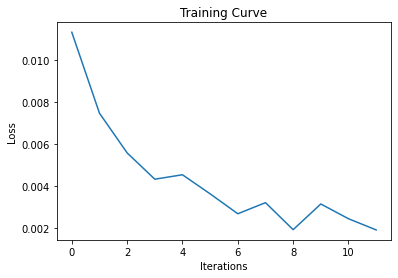

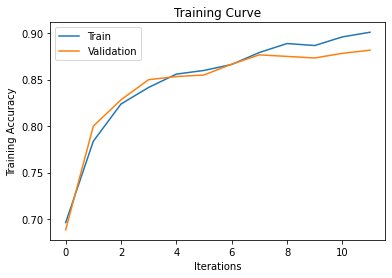

Final Training Accuracy: 0.9010007147962831
Final Validation Accuracy: 0.8816666666666667


In [ ]:
train_tf(resnet18, train_data, valid_data,
          batch_size=128, num_epochs=12, learning_rate=0.00055)

In [ ]:
# Below is for Webapp test
# load model:
test_model = resnet18
test_model_path = get_model_name("Resnet18", 128, 0.00055, 11)
state = torch.load(test_model_path)
test_model.load_state_dict(state)


<All keys matched successfully>

In [ ]:
import anvil.server
anvil.server.connect("HFXBHMCS722UG3NOXRELJZWC-7RPGQMMZ6PDTAIB7")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
import anvil.media
from PIL import Image
from torchvision.io import read_image
classes = ['Agaricus_Diminutivus', 'Amanita_Bisporigera', 'Amanita_Muscaria', 'Boletus_Edulis', 'Cantharellus', 'Lactarius_Rufus', 'Omphalotus_Olearius', 'Russula_Mariae']

@anvil.server.callable
def classify_mushrooms(file):
    with anvil.media.TempFile(file) as filename:
      img = read_image(filename)
      batch = torch.stack([img]).to(device)
      predictor = Predictor().to(device)
      res = predictor(batch, test_model)
      # res = res[0].item()
      pred_class = classes[res[0].item()]
      edible = "poisonous ヾ(≧へ≦)〃"
      if edible_poisonous_classifier(res)[0] == 1:
        edible = "edible o(*￣▽￣*)ブ"

      return pred_class, edible


In [ ]:
# from torchvision.models import resnet18
import torchvision.transforms as T

class Predictor(nn.Module):

    def __init__(self):
        super().__init__()
        # self.model = resnet18(pretrained=True, progress=False).eval()
        self.model = test_model.eval()
        self.transforms = nn.Sequential(
            T.Resize([256, ]),  # We use single int value inside a list due to torchscript type restrictions
            T.CenterCrop(224),
            T.ConvertImageDtype(torch.float),
            # T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])           # Normalize !!!
        )

    def forward(self, x: torch.Tensor, test_model) -> torch.Tensor:
        with torch.no_grad():
          x = self.transforms(x)
          y_pred = self.model(x)
          return y_pred.argmax(dim=1)

In [ ]:
# Draft:
import anvil.media
from PIL import Image

@anvil.server.callable
def classify_mushroom(file):
    with anvil.media.TempFile(file) as filename:
        # img = load_img(filename)
        path = "/content/test_img/"
        # with Image.open(file) as im:
        #   im.save(path+filename)
        
        !mv filename path
        for i in range(64):
          !cp filename path
        transform = transforms.Compose([transforms.Resize((7,7)), 
                                  transforms.ToTensor()])  
        test_data = torchvision.datasets.ImageFolder(root=path, transform=transform)
        test_loader = torch.utils.data.DataLoader(test_data, 
                      batch_size=128, num_workers=1, shuffle=True)
        img = Image.open(filename) 
            
        # img = transform(img)
        # img = torch.unsqueeze(img, 0)
        # img_new = torch.zeros(64, 3, 7, 7)
        # for i in range(64):
        #   img_new[i] = img
        #   print(img)
        output = best_model(test_loader)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        # Inside the classify_image function
        pred = pred[0]
        # score = model.predict(arr)
        return pred
